<a href="https://colab.research.google.com/github/EchaAz/Virtual-Internship-Home-Credit-Final/blob/main/Virtual_Internship_Home_Credit_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from sklearn.preprocessing import LabelEncoder

In [96]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', None)

In [98]:
application_test = pd.read_csv('/content/drive/MyDrive/Virtual-Internship-Home-Credit-Final/application_test.csv')
application_train = pd.read_csv('/content/drive/MyDrive/Virtual-Internship-Home-Credit-Final/application_train.csv')
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [99]:
application_train.agg(['count','size','nunique'])

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511,307511,307511,307511,307511,307511,307511,307511,307511,307499,307233,306219,307511,307511,307511,307511,307511,307511,307511,307511,307511,104582,307511,307511,307511,307511,307511,307511,211120,307509,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,134133,306851,246546,151450,127568,157504,103023,92646,143620,152683,154491,98869,124921,97312,153161,93997,137829,151450,127568,157504,103023,92646,143620,152683,154491,98869,124921,97312,153161,93997,137829,151450,127568,157504,103023,92646,143620,152683,154491,98869,124921,97312,153161,93997,137829,97216,153214,159080,151170,161756,306490,306490,306490,306490,307510,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,265992,265992,265992,265992,265992,265992
size,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511
nunique,307511,2,2,3,2,2,15,2548,5603,13672,1002,7,8,5,6,6,81,17460,12574,15688,6168,62,2,2,

We count the unique value in the table

Target distribution observation

In [100]:
notLate=application_train[application_train.TARGET==0]
late=application_train[application_train.TARGET==1]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


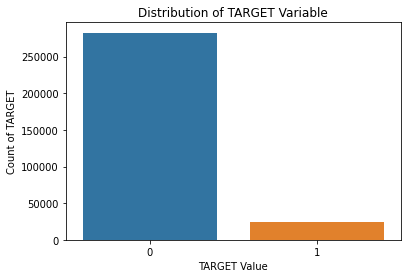

In [101]:
sns.countplot(application_train.TARGET)
plt.xlabel("TARGET Value")
plt.ylabel("Count of TARGET")
plt.title("Distribution of TARGET Variable")
plt.show()

In [102]:
percentage_notLate=(len(notLate)*100)/len(application_train)
percentage_late=(len(late)*100)/len(application_train)

print("The Percentage of client who have no late payment:",round(percentage_notLate,2),"%")
print("The Percentage of people who have late payment:",round(percentage_late,2),"%")

The Percentage of client who have no payment difficulties: 91.93 %
The Percentage of people who have payment difficulties: 8.07 %


We got our first insight that there are more client who have no problem paying rather than client who late payment with the percentage is client who have no payment difficulties is 91.93 % and people who have payment difficulties is 8.07 %


Data cleaning, clean columns that have many missing data

In [103]:
#Function to calculate meta-data to identify % of data is missing in each column
def meta_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    unique = data.nunique()
    datatypes = data.dtypes
    return pd.concat([total, percent, unique, datatypes], axis=1, keys=['Total', 'Percent', 'Unique', 'Data_Type']).sort_values(by="Percent", ascending=False)

In [104]:
#calculating meta-data for application_train
app_meta_data=meta_data(application_train)
app_meta_data.head(None)

,Total,Percent,Unique,Data_Type
COMMONAREA_MEDI,214865,69.872297,3202,float64
COMMONAREA_AVG,214865,69.872297,3181,float64
COMMONAREA_MODE,214865,69.872297,3128,float64
NONLIVINGAPARTMENTS_MODE,213514,69.432963,167,float64
NONLIVINGAPARTMENTS_AVG,213514,69.432963,386,float64
NONLIVINGAPARTMENTS_MEDI,213514,69.432963,214,float64
FONDKAPREMONT_MODE,210295,68.386172,4,object
LIVINGAPARTMENTS_MODE,210199,68.354953,736,float64
LIVINGAPARTMENTS_AVG,210199,68.354953,1868,float64
LIVINGAPARTMENTS_MEDI,210199,68.354953,1097,float64


In [105]:
#dropping columns with more than 57% missing values 
#Selected 57% because we don't want to drop EXT_SOURCE_1 which is an important variable
cols_to_keep=list(app_meta_data[(app_meta_data.Percent<57)].index)
cols_to_keep2=list(app_meta_data[(app_meta_data.Percent<57)].index)
application_train=application_train[cols_to_keep]
application_train.describe()

,EXT_SOURCE_1,NONLIVINGAREA_MODE,NONLIVINGAREA_AVG,NONLIVINGAREA_MEDI,ELEVATORS_MEDI,ELEVATORS_AVG,ELEVATORS_MODE,APARTMENTS_MEDI,APARTMENTS_AVG,APARTMENTS_MODE,ENTRANCES_MEDI,ENTRANCES_AVG,ENTRANCES_MODE,LIVINGAREA_AVG,LIVINGAREA_MODE,LIVINGAREA_MEDI,FLOORSMAX_MODE,FLOORSMAX_MEDI,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_AVG,TOTALAREA_MODE,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,CNT_CHILDREN,FLAG_DOCUMENT_8,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_9,FLAG_DOCUMENT_21,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_12,AMT_CREDIT,AMT_INCOME_TOTAL,FLAG_PHONE,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,TARGET,REG_CITY_NOT_LIVE_CITY,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,HOUR_APPR_PROCESS_START,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,FLAG_EMAIL,FLAG_CONT_MOBILE,FLAG_WORK_PHONE,FLAG_EMP_PHONE,FLAG_MOBIL,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,SK_ID_CURR
count,134133.000000,137829.000000,137829.000000,137829.000000,143620.000000,143620.000000,143620.000000,151450.000000,151450.00000,151450.000000,152683.000000,152683.000000,152683.000000,153161.000000,153161.000000,153161.000000,154491.000000,154491.000000,154491.000000,157504.000000,157504.000000,157504.000000,159080.000000,246546.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,306490.000000,306490.000000,306490.000000,306490.000000,3.068510e+05,3.072330e+05,307499.000000,307509.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.502130,0.027022,0.028358,0.028236,0.078078,0.078942,0.074490,0.117850,0.11744,0.114231,0.149213,0.149725,0.145193,0.107399,0.105975,0.108607,0.222315,0.225897,0.226282,0.977065,0.977752,0.977735,0.102547,0.510853,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974,1.422245,0.143421,1.405292,0.100049,5.143927e-01,5.383962e+05,27108.573909,2.152665,-962.858788,0.417052,0.081376,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.003896,0.000335,0.000023,0.003912,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000007,5.990260e+05,1.687979e+05,0.281066,0.179555,0.230454,0.080729,0.078173,0.040659,0.050769,0.015144,12.063419,2.031521,2.052463,0.056720,0.998133,0.199368,0.819889,0.999997,-2994.202373,-4986.120328,63815.045904,-16036.995067,0.020868,278180.518577
std,0.211062,0.070254,0.069523,0.070166,0.134467,0.134576,0.132256,0.109076,0.10824,0.107936,0.100368,0.100049,0.100977,0.110565,0.111845,0.112260,0.143709,0.145067,0.144641,0.064575,0.059897,0.059223,0.107462,0.194844,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295,2.400989,0.446698,2.379803,0.362291,1.910602e-01,3.694465e+05,14493.737315,0.910682,826.808487,0.722121,0.273412,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.062295,0.018299,0.004771,0.062424,0.059268,0.

In [106]:
#drop the same column for application_test data aswell except TARGET
cols_to_keep2.remove('TARGET')
application_test=application_test[cols_to_keep2]
application_test.describe()

,EXT_SOURCE_1,NONLIVINGAREA_MODE,NONLIVINGAREA_AVG,NONLIVINGAREA_MEDI,ELEVATORS_MEDI,ELEVATORS_AVG,ELEVATORS_MODE,APARTMENTS_MEDI,APARTMENTS_AVG,APARTMENTS_MODE,ENTRANCES_MEDI,ENTRANCES_AVG,ENTRANCES_MODE,LIVINGAREA_AVG,LIVINGAREA_MODE,LIVINGAREA_MEDI,FLOORSMAX_MODE,FLOORSMAX_MEDI,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_AVG,TOTALAREA_MODE,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,CNT_CHILDREN,FLAG_DOCUMENT_8,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_9,FLAG_DOCUMENT_21,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_12,AMT_CREDIT,AMT_INCOME_TOTAL,FLAG_PHONE,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,HOUR_APPR_PROCESS_START,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,FLAG_EMAIL,FLAG_CONT_MOBILE,FLAG_WORK_PHONE,FLAG_EMP_PHONE,FLAG_MOBIL,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,SK_ID_CURR
count,28212.000000,22660.000000,22660.000000,22660.000000,23555.000000,23555.000000,23555.000000,24857.000000,24857.000000,24857.000000,25165.000000,25165.000000,25165.000000,25192.000000,25192.000000,25192.000000,25423.000000,25423.000000,25423.000000,25888.000000,25888.000000,25888.000000,26120.000000,40076.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,48715.000000,48715.000000,48715.000000,48715.000000,48736.000000,4.874400e+04,48720.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.0,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.0,48744.0,48744.000000,48744.0,48744.0,48744.0,48744.0,48744.0,48744.000000,48744.0,48744.0,48744.0,4.874400e+04,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000
mean,0.501180,0.028161,0.029387,0.029296,0.084128,0.085168,0.080570,0.122809,0.122388,0.119078,0.151200,0.151777,0.147161,0.112286,0.110687,0.113368,0.229390,0.233154,0.233706,0.978292,0.978822,0.978828,0.107129,0.500106,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769,1.447644,0.143652,1.435738,0.101139,0.518021,4.626188e+05,29426.240209,2.146767,-1077.766228,0.397054,0.088462,0.0,0.786620,0.000103,0.014751,0.087477,0.000041,0.004493,0.0,0.0,0.001169,0.0,0.0,0.0,0.0,0.0,0.001559,0.0,0.0,0.0,5.167404e+05,1.784318e+05,0.263130,0.174216,0.224664,0.077466,0.042036,0.055166,0.018833,12.007365,2.012596,2.038159,0.162646,0.998400,0.204702,0.809720,0.999979,-3051.712949,-4967.652716,67485.366322,-16068.084605,0.021226,277796.676350
std,0.205142,0.073504,0.072007,0.072998,0.139014,0.139164,0.137509,0.114184,0.113112,0.113465,0.100931,0.100669,0.101748,0.114860,0.116699,0.116503,0.146485,0.147629,0.147361,0.053782,0.049663,0.049318,0.111420,0.189498,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873,3.608053,0.514413,3.580125,0.403791,0.181278,3.367102e+05,16016.368315,0.890423,878.920740,0.709047,0.283969,0.0,0.409698,0.010128,0.120554,0.282536,0.006405,0.066879,0.0,0.0,0.034176,0.0,0.0,0.0,0.0,0.0,0.039456,0.0,0.0,0.0,3.653970e+05,1.015226e+05,0.440337,0.379299,0.417365,0.267332,0.200673,0.228306,0.135937,3.278172,0.515804,0.522694,0.369046,0.039971,0.403488,0.392526,0.004529,1569.276709,3552.612035,144348.507136,4325.90

In [107]:
# Removing Outlier
# FUNCTION FOR PLOTTING BOX PLOT AND HISTOGRAM

def plot_boxhist(var):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    s=sns.boxplot(y=late[var]);
    plt.title('Box Plot of '+ '%s' %var +' for late', fontsize=10)
    plt.xlabel('%s' %var)
    plt.ylabel("Count of Loans")
    plt.subplot(1, 2, 2)
    s=plt.hist(x=late[var]);
    plt.xlabel('%s' %var)
    plt.ylabel("Count of Loans")
    plt.title('Histogram of '+ '%s' %var +' for late', fontsize=10)
plt.show()

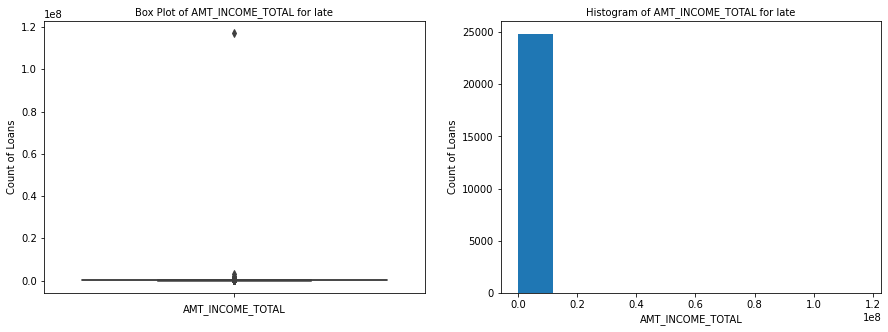

In [108]:
plot_boxhist('AMT_INCOME_TOTAL')

In [109]:
#Removing all entries above 99 percentile
application_train=application_train[application_train.AMT_INCOME_TOTAL<np.nanpercentile(application_train['AMT_INCOME_TOTAL'], 99)]

#update dataframes
notLate=application_train[application_train.TARGET==0]
late=application_train[application_train.TARGET==1]

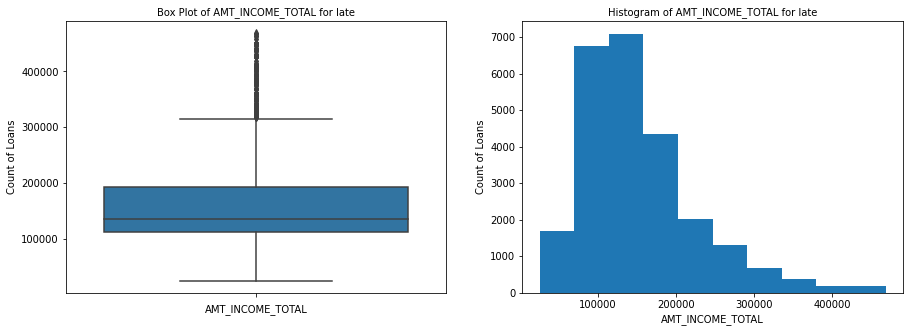

In [110]:
plot_boxhist('AMT_INCOME_TOTAL')

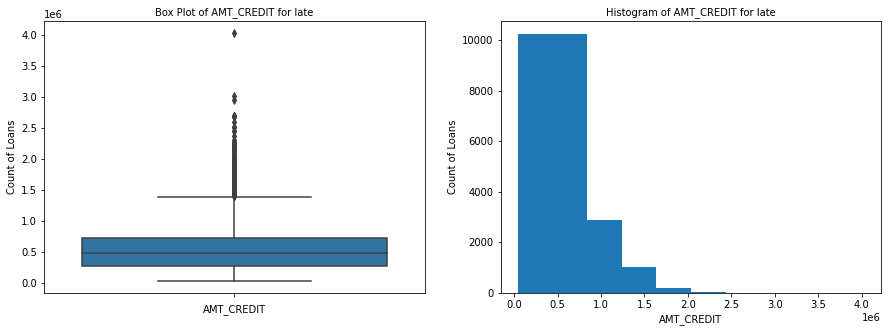

In [111]:
plot_boxhist('AMT_CREDIT')

In [112]:
#Removing all entries above 99 percentile
application_train=application_train[application_train.AMT_CREDIT<np.nanpercentile(application_train['AMT_CREDIT'], 99)]

#update dataframes
notLate=application_train[application_train.TARGET==0]
late=application_train[application_train.TARGET==1]

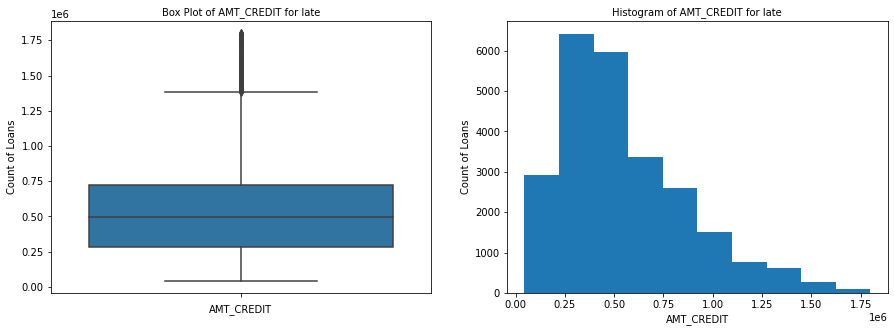

In [113]:
plot_boxhist('AMT_CREDIT')

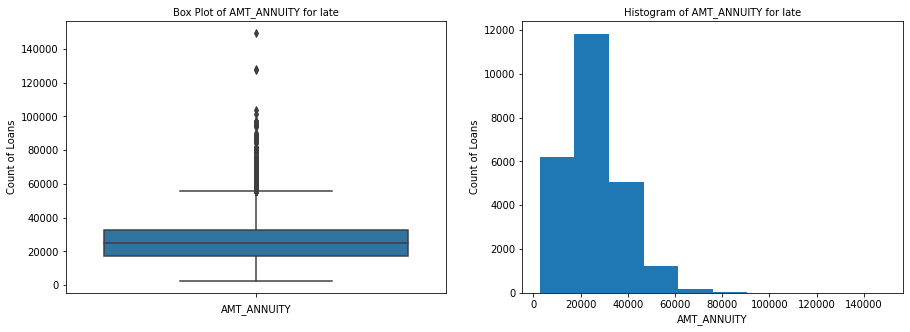

In [114]:
plot_boxhist('AMT_ANNUITY')

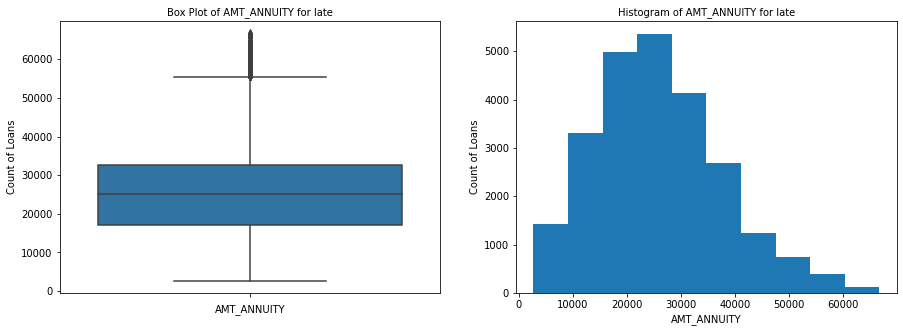

In [115]:
#Removing all entries above 99 percentile
application_train=application_train[application_train.AMT_ANNUITY<np.nanpercentile(application_train['AMT_ANNUITY'], 99)]

#update dataframes
notLate=application_train[application_train.TARGET==0]
late=application_train[application_train.TARGET==1]
plot_boxhist('AMT_ANNUITY')

count    297685.000000
mean      64740.887237
std      142028.033433
min      -17912.000000
25%       -2738.000000
50%       -1198.000000
75%        -279.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

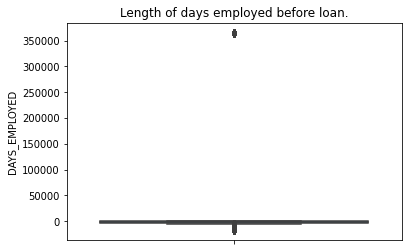

In [116]:
sns.boxplot(y=application_train['DAYS_EMPLOYED']);
plt.title('Length of days employed before loan.');
application_train['DAYS_EMPLOYED'].describe()

In [117]:
application_train['DAYS_EMPLOYED']=application_train['DAYS_EMPLOYED'].replace(365243, np.nan)
application_train['DAYS_EMPLOYED'].describe()

count    243339.000000
mean      -2371.609405
std        2332.548767
min      -17912.000000
25%       -3158.000000
50%       -1635.000000
75%        -761.000000
max           0.000000
Name: DAYS_EMPLOYED, dtype: float64

Analyis on Categorical Columns

In [118]:
notLate=application_train[application_train.TARGET==0]
late=application_train[application_train.TARGET==1]

In [119]:
application_train.select_dtypes('object').columns

Index(['WALLSMATERIAL_MODE', 'HOUSETYPE_MODE', 'EMERGENCYSTATE_MODE',
       'OCCUPATION_TYPE', 'NAME_TYPE_SUITE', 'NAME_CONTRACT_TYPE',
       'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'NAME_HOUSING_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE'],
      dtype='object')

In [120]:
## FUNCTION TO PLOT CHARTS

def plot_charts(var, label_rotation,horizontal_layout):
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(15,20))
    
    s1=sns.countplot(ax=ax1,x=late[var], data=late, order= late[var].value_counts().index,)
    ax1.set_title('Distribution of '+ '%s' %var +' for late', fontsize=10)
    ax1.set_xlabel('%s' %var)
    ax1.set_ylabel("Count of Loans")
    if(label_rotation):
        s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
    s2=sns.countplot(ax=ax2,x=notLate[var], data=notLate, order= notLate[var].value_counts().index,)
    if(label_rotation):
       s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
    ax2.set_xlabel('%s' %var)
    ax2.set_ylabel("Count of Loans")
    ax2.set_title('Distribution of '+ '%s' %var +' for not late', fontsize=10)
    plt.show()

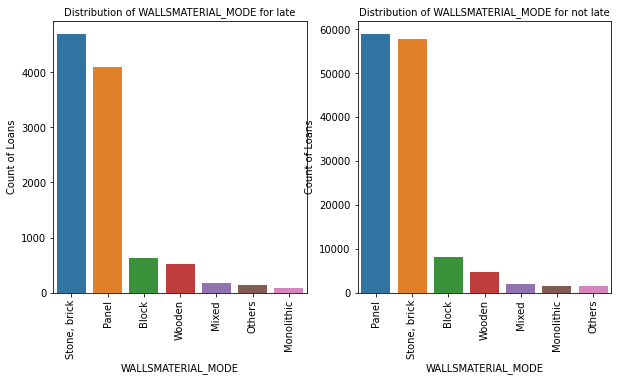

In [121]:
plot_charts('WALLSMATERIAL_MODE', label_rotation=True,horizontal_layout=True)

For client who late in payment majority have wall type of stone brick and panel. For client who is not late in payment majority have wall type of panel and stone brick

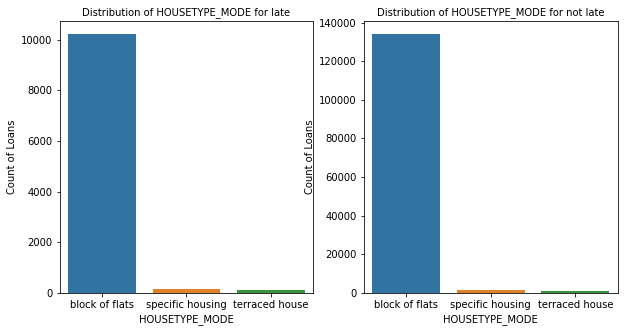

In [122]:
plot_charts('HOUSETYPE_MODE', label_rotation=False,horizontal_layout=True)

For both client who is late and not late in payment majority have house type as block of flats

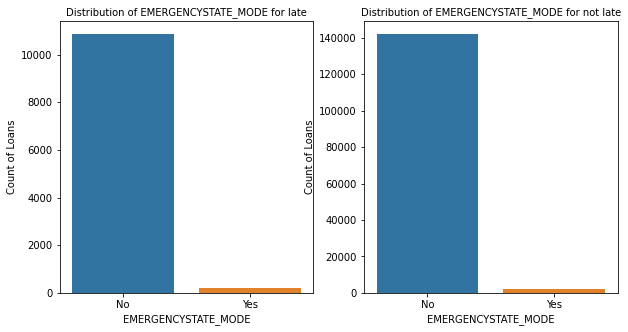

In [123]:
plot_charts('EMERGENCYSTATE_MODE', label_rotation=False,horizontal_layout=True)

For both client who is late and not late in payment majority is not in majority state

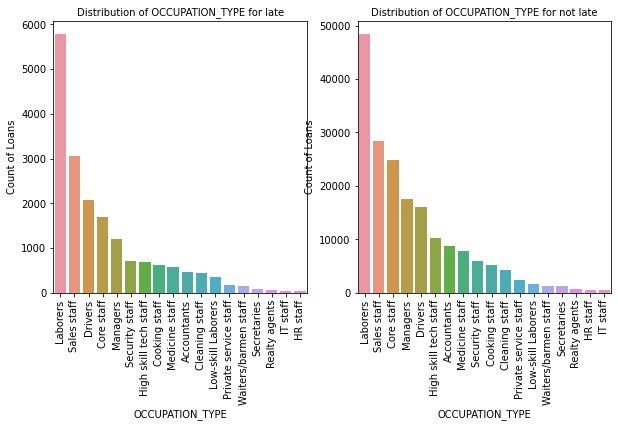

In [124]:
plot_charts('OCCUPATION_TYPE', label_rotation=True,horizontal_layout=True)

For both client who is late and not late in payment majority have job as laborer

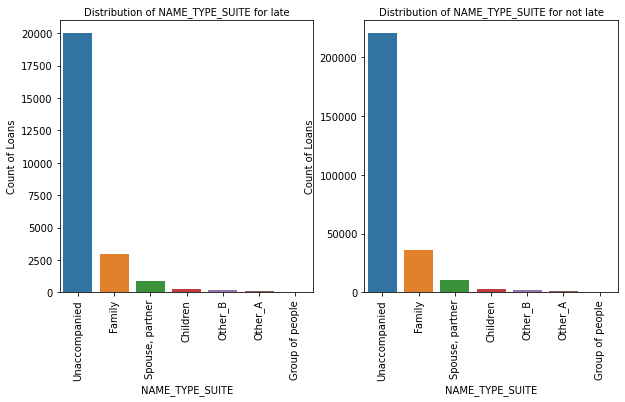

In [125]:
plot_charts('NAME_TYPE_SUITE', label_rotation=True,horizontal_layout=True)

For both client who is late and not late in payment majority have type suite of unaccompanied

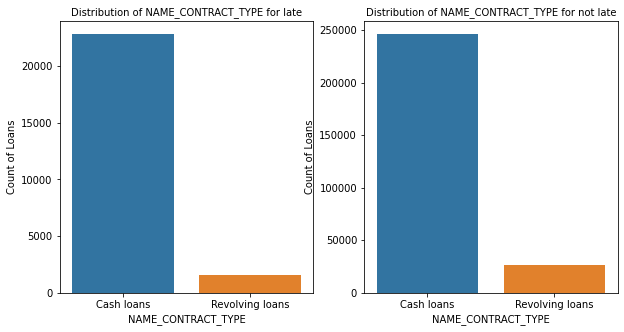

In [126]:
plot_charts('NAME_CONTRACT_TYPE', label_rotation=False,horizontal_layout=True)

For both client who is late and not late in payment majority have contract type cash loans

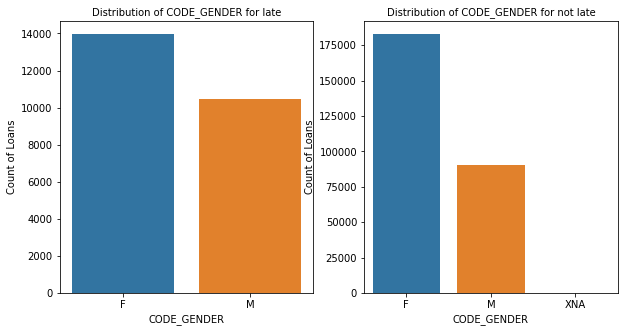

In [127]:
plot_charts('CODE_GENDER', label_rotation=False,horizontal_layout=True)

For both client who is late and not late in payment majority is female gender

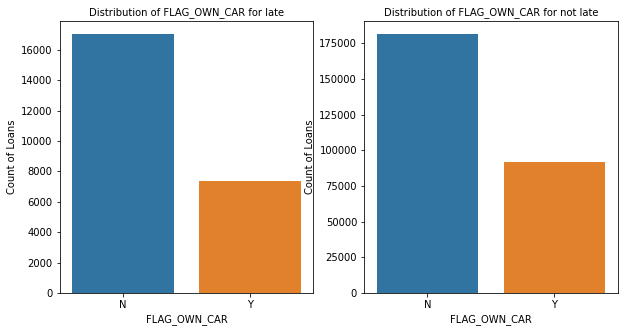

In [128]:
plot_charts('FLAG_OWN_CAR', label_rotation=False,horizontal_layout=True)

For both client who is late and not late in payment majority does not own a car

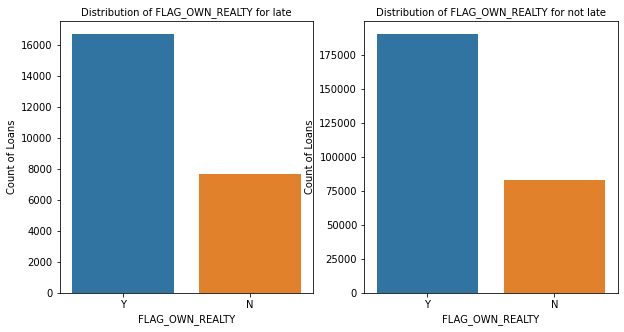

In [129]:
plot_charts('FLAG_OWN_REALTY', label_rotation=False,horizontal_layout=True)

For both client who is late and not late in payment majority does own a house

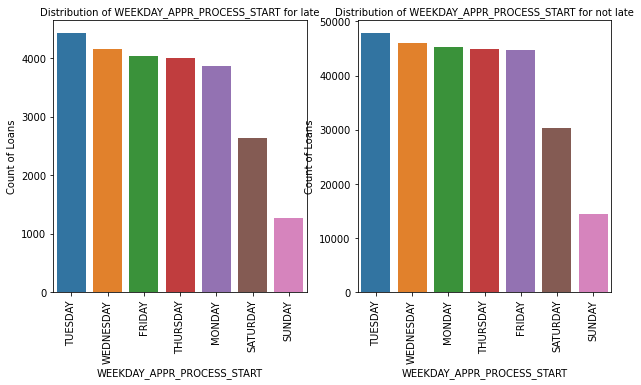

In [130]:
plot_charts('WEEKDAY_APPR_PROCESS_START', label_rotation=True,horizontal_layout=True)

For both client who is late and not late in payment majority apply for a loan in working day with majority in tuesday

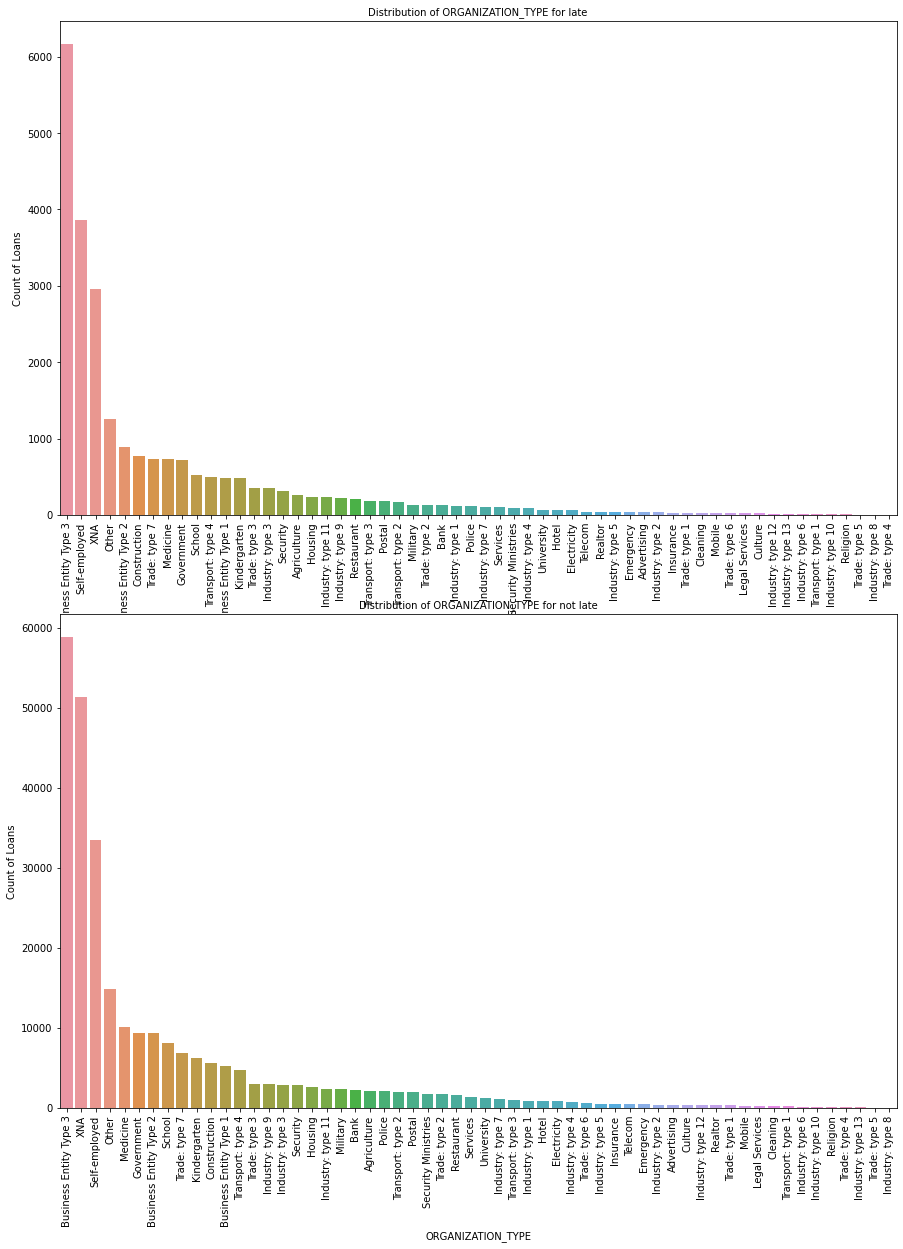

In [131]:
plot_charts('ORGANIZATION_TYPE', label_rotation=True,horizontal_layout=False)

For both client who is late and not late in payment majority work in organization type Business Entity Type 3

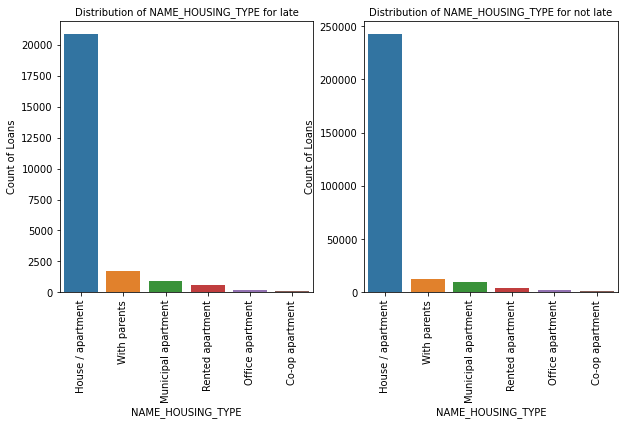

In [132]:
plot_charts('NAME_HOUSING_TYPE', label_rotation=True,horizontal_layout=True)

For both client who is late and not late in payment majority have housing type of house/apartement

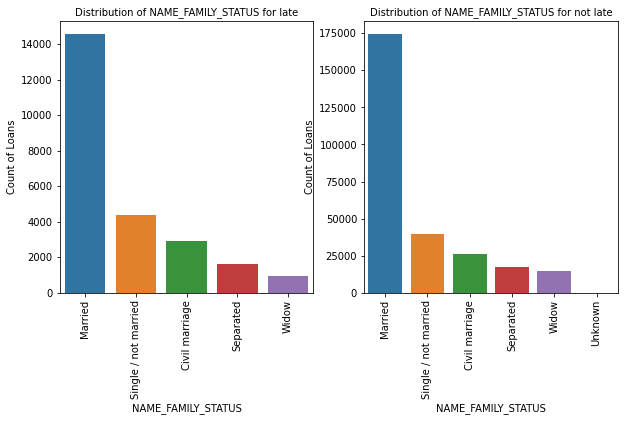

In [133]:
plot_charts('NAME_FAMILY_STATUS', label_rotation=True,horizontal_layout=True)

For both client who is late and not late in payment majority does is married

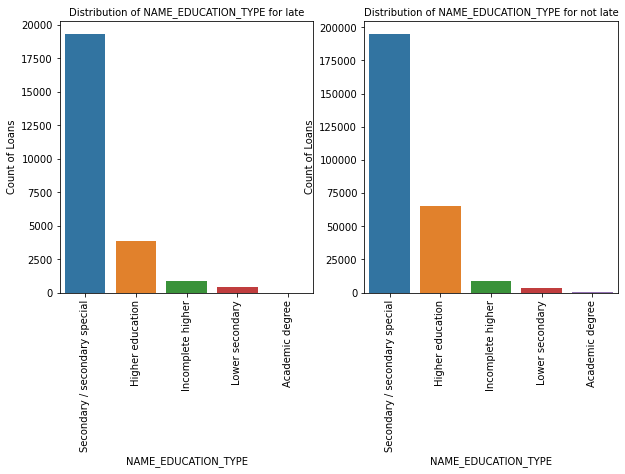

In [134]:
plot_charts('NAME_EDUCATION_TYPE', label_rotation=True,horizontal_layout=True)

For both client who is late and not late in payment majority have secondary education

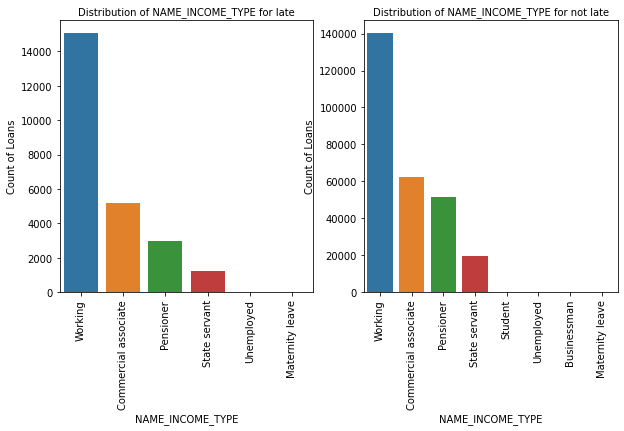

In [135]:
plot_charts('NAME_INCOME_TYPE', label_rotation=True,horizontal_layout=True)

For both client who is late and not late in payment majority have income type working

Create a machine learning model to predict target in application_test

In [136]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [137]:
x_array = MultiColumnLabelEncoder(columns = ['WALLSMATERIAL_MODE', 'HOUSETYPE_MODE', 'EMERGENCYSTATE_MODE',
       'OCCUPATION_TYPE', 'NAME_TYPE_SUITE', 'NAME_CONTRACT_TYPE',
       'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'NAME_HOUSING_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE']).fit_transform(application_train)

In [138]:
target = x_array.pop('TARGET')
target.size

297685

In [139]:
#x_array=np.asarray(x_array)
#y_array=np.asarray(target)

In [145]:
model=tf.keras.models.Sequential([
        tf.keras.layers.Dense(1000, activation='relu'),
        tf.keras.layers.Dense(500, activation='relu',),
        tf.keras.layers.Dense(300, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1, activation='sigmoid'),
    ])
model.compile(optimizer = RMSprop(learning_rate=0.0001), 
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])
model.fit(x=x_array,
              y=target,
              epochs=10,
              verbose=1)

Epoch 1/10
9303/9303 [==============================] - 30s 3ms/step - loss: nan - accuracy: 0.9180
Epoch 2/10
9303/9303 [==============================] - 30s 3ms/step - loss: nan - accuracy: 0.9180
Epoch 3/10
9303/9303 [==============================] - 30s 3ms/step - loss: nan - accuracy: 0.9180
Epoch 4/10
9303/9303 [==============================] - 29s 3ms/step - loss: nan - accuracy: 0.9180
Epoch 5/10
9303/9303 [==============================] - 29s 3ms/step - loss: nan - accuracy: 0.9180
Epoch 6/10
9303/9303 [==============================] - 30s 3ms/step - loss: nan - accuracy: 0.9180
Epoch 7/10
9303/9303 [==============================] - 30s 3ms/step - loss: nan - accuracy: 0.9180
Epoch 8/10
9303/9303 [==============================] - 31s 3ms/step - loss: nan - accuracy: 0.9180
Epoch 9/10
9303/9303 [==============================] - 29s 3ms/step - loss: nan - accuracy: 0.9180
Epoch 10/10
9303/9303 [==============================] - 32s 3ms/step - loss: nan - accuracy: 0.9180

In [146]:
x_test = MultiColumnLabelEncoder(columns = ['WALLSMATERIAL_MODE', 'HOUSETYPE_MODE', 'EMERGENCYSTATE_MODE',
       'OCCUPATION_TYPE', 'NAME_TYPE_SUITE', 'NAME_CONTRACT_TYPE',
       'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'NAME_HOUSING_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE']).fit_transform(application_test)
#x_test=np.asarray(x_test)

In [143]:
prediction = model.predict(x_test)

In [147]:
prediction

array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]], dtype=float32)